#### Task Instructions
- Impute missing values in the **"Embarked"** feature instead of dropping them.  
- Create a new feature: **`family_size`** = `parch` + `sibsp`, and explore its relationship with survival rate.  
- Determine how many passengers were alone and their survival rate.  
- Identify the top 3 `family_size` categories with the highest survival rates.  
  - *Hint:* Check out `sort_values()` and `nlargest()` methods.  
- Explore survival rates across different **age groups**.  
- Compare which age groups have the **lowest** and **highest** survival rates for both males and females.  


In [ ]:
#!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mostafamohmmad","key":"2da0f581902b953613d8ba080bbebc23"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 100MB/s]


In [5]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
df = pd.read_csv('train.csv')
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.sample()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.05,NaN,S


#### Feature Removal
For this analysis, we will drop the following unnecessary columns:  
- **PassengerId** – unique identifier only.  
- **Name** – contains too much variation for this task.  
- **Ticket** – mostly unique and not predictive.  
- **Cabin** – too many missing values.  


In [10]:
df.drop(['passengerid', 'name', 'ticket', 'cabin'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2


In [12]:
df.isnull().mean()*100

,0
survived,0.000000
pclass,0.000000
sex,0.000000
age,19.865320
sibsp,0.000000
parch,0.000000
fare,0.000000
embarked,0.224467


#### Missing Data
≈ 20% of **Age** values are missing.  
≈ 0.22% of **Embarked** values are missing.  


# Data Imputation – "Embarked"
Since **Embarked** is categorical, we can handle missing values using:  
- **Mode imputation** – fill with the most frequent value.  
- **Group-based mode imputation** – if missing values correlate with another feature.  
- **“Unknown” category** – if missing values carry meaning.  
- **Scikit-learn imputation** – useful in ML pipelines.  


#### Correlation Check
Before imputing, we’ll check whether **Embarked** correlates with other features using a heatmap.  
First, convert **Embarked** from categorical to numeric (no inherent order):  

```
C => 0  
Q => 1  
S => 2  
NaN => 3
```

Similarly, convert **Sex**:  
```
Male => 0  
Female => 1
```


In [13]:
df_test = df.copy()

In [14]:
df_test['EncodedEmbarked'] = df['embarked'].map({'C':0,'Q':1,'S':2,'Nan':3})
df_test['EncodedSexes'] = df['sex'].map({'male':0,'female':1})

In [15]:
df_test.drop(['embarked','sex'], axis=1, inplace=True)

<Axes: >

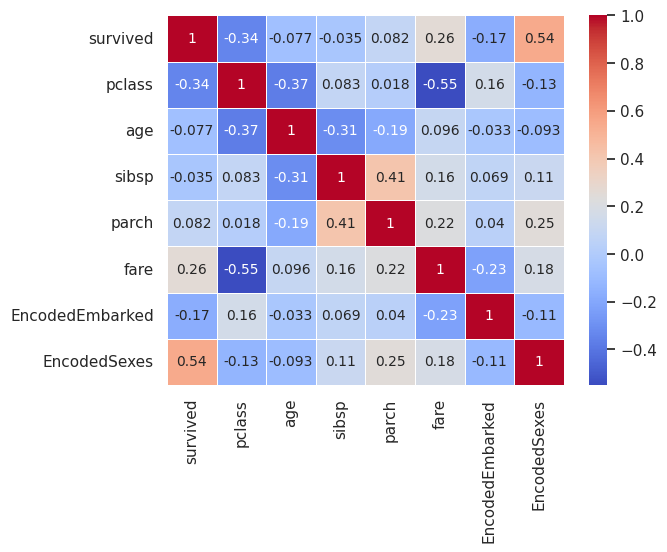

In [16]:
sns.heatmap(df_test.corr(),annot=True,cmap='coolwarm',linewidths=0.5,linecolor='white',annot_kws={"size":10})

#### Imputation Decision
No strong correlations were found with **Embarked**, so we can safely replace missing values with the **mode**.


In [17]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

/tmp/ipython-input-1964997694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [18]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,0


#### Creating `family_size`
We combine **`parch`** and **`sibsp`**:  
```
family_size = parch + sibsp
```
We then explore how survival rate changes across different family sizes.


In [19]:
df['family_size']=df['parch']+df['sibsp']
#df.drop(['parch','sibsp'], axis=1, inplace=True) #this one is optional

In [20]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,family_size
43,1,2,female,3.0,1,2,41.5792,C,3
200,0,3,male,28.0,0,0,9.5000,S,0
856,1,1,female,45.0,1,1,164.8667,S,2
257,1,1,female,30.0,0,0,86.5000,S,0
461,0,3,male,34.0,0,0,8.0500,S,0


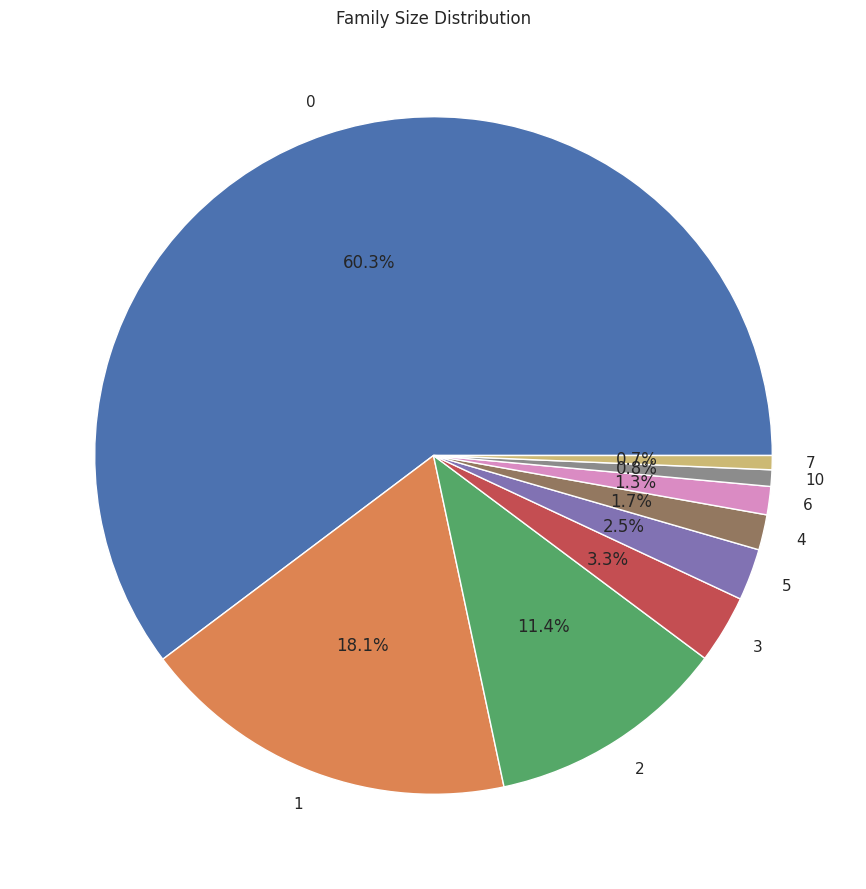

In [21]:
plt.figure(figsize=(15,11))
plt.pie(df['family_size'].value_counts(), labels=df['family_size'].value_counts().index, autopct='%1.1f%%')
plt.title('Family Size Distribution')
plt.show()

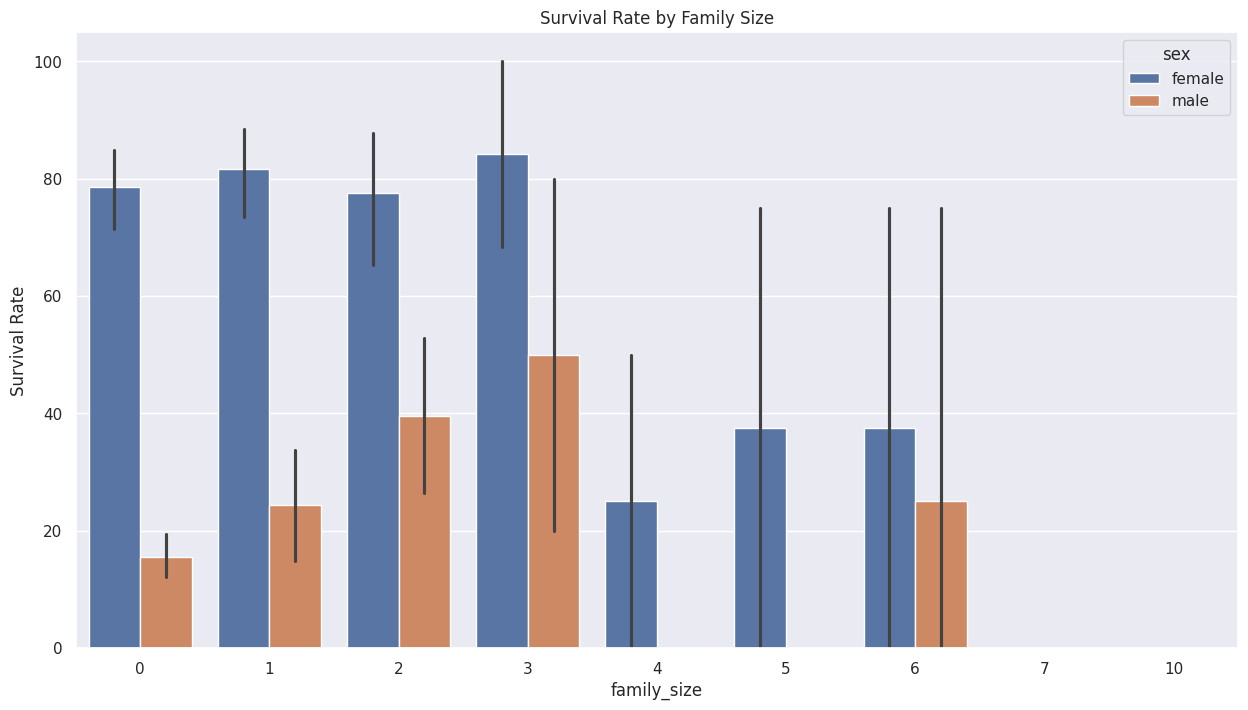

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(x='family_size', y=(df['survived']*100), data=df , hue='sex')
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()

In [23]:
familySurvivalRate = df.groupby('family_size')['survived'].mean().sort_values(ascending=False) *100
familySurvivalRate

,survived
family_size,
3,72.413793
2,57.843137
1,55.279503
6,33.333333
0,30.353818
4,20.000000
5,13.636364
7,0.000000
10,0.000000


#### Key Finding
The top 3 family sizes with the highest survival rates are: **3**, **2**, and **1** (in that order).


#### Results by Gender
- **Males**: Highest survival rate → *Greatest Generation* (1910–1912)  
- **Females**: Highest survival rate → *Pre-Victorian* (≤ 1869)  
- **Males**: Lowest survival rate → *Lost Generation* (1883–1900)  
- **Females**: Lowest survival rate → *Early 20th* (1901–1909)  


#### Age Group Analysis
Before grouping ages, ensure there are no missing values in the **Age** column.  
We divide ages based on **generations** people were born into (relative to Titanic’s sinking in April 1912).


In [24]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,0
family_size,0


In [25]:
df.groupby(["sex", "pclass", "embarked", "family_size"])['age'].mean()


sex     pclass  embarked  family_size
female  1       C         0              35.1250
                          1              39.3125
                          2              35.0000
                          4              19.5000
                Q         1              33.0000
                                          ...   
male    3       S         4               9.0000
                          5              11.7500
                          6              13.7500
                          7               8.7500
                          10                 NaN
Name: age, Length: 71, dtype: float64

In [26]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df[['age']] = imputer.fit_transform(df[['age']])

In [27]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
family_size,0


<Axes: >

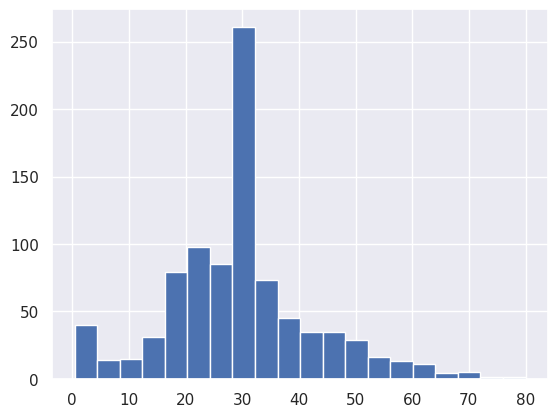

In [28]:
df.age.hist(bins=20)

The Titanic sank on 15 April 1912 so we are going to divide the groups based on the generations the people were born into

In [29]:
df['generation'] = pd.cut(df['age'],
    bins=[0, 2, 11, 29, 41, 70],
    labels=['Greatest Gen (1910-1912)',
            'Early 20th (1901-1909)',
            'Lost Generation (1883-1900)',
            'Victorian / Gilded (1870-1882)',
            'Pre-Victorian (<=1869)'])

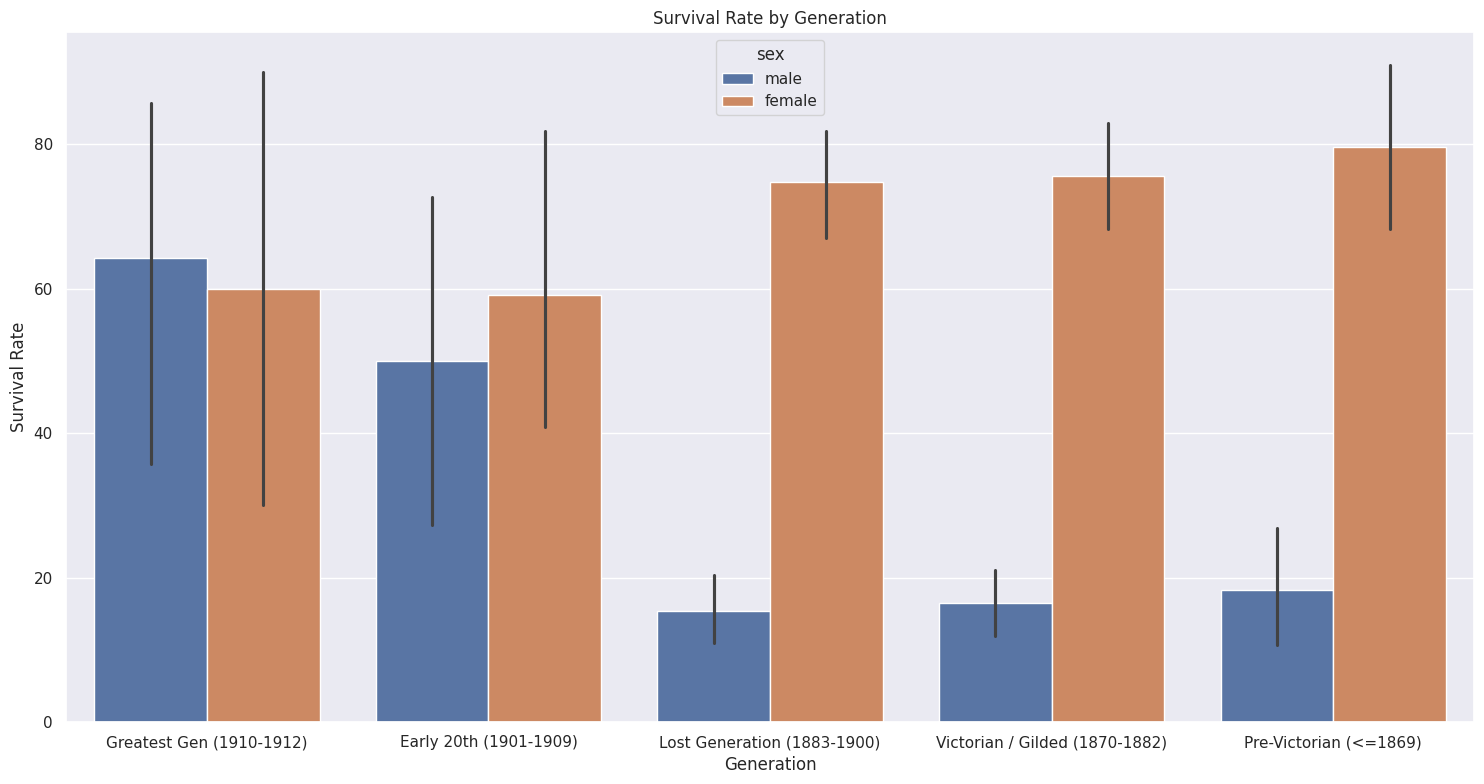

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x='generation', y=(df['survived']*100), data=df , hue='sex')
plt.xlabel('Generation')
plt.title('Survival Rate by Generation')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

In [31]:
df.groupby(['generation','sex'])['survived'].mean()*100

/tmp/ipython-input-4284490049.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['generation','sex'])['survived'].mean()*100


generation                      sex   
Greatest Gen (1910-1912)        female    60.000000
                                male      64.285714
Early 20th (1901-1909)          female    59.090909
                                male      50.000000
Lost Generation (1883-1900)     female    74.782609
                                male      15.422886
Victorian / Gilded (1870-1882)  female    75.609756
                                male      16.528926
Pre-Victorian (<=1869)          female    79.545455
                                male      18.279570
Name: survived, dtype: float64

As show above
- the highest survival rate for males are the      Greatest Gen (1910-1912)
- the highest survival rate for females are the    Pre-Victorian (<=1869)
- the lowest survival rate for males are the       Lost Generation (1883-1900)
- the lowest survival rate for females are the     Early 20th (1901-1909)

#Additional Plots

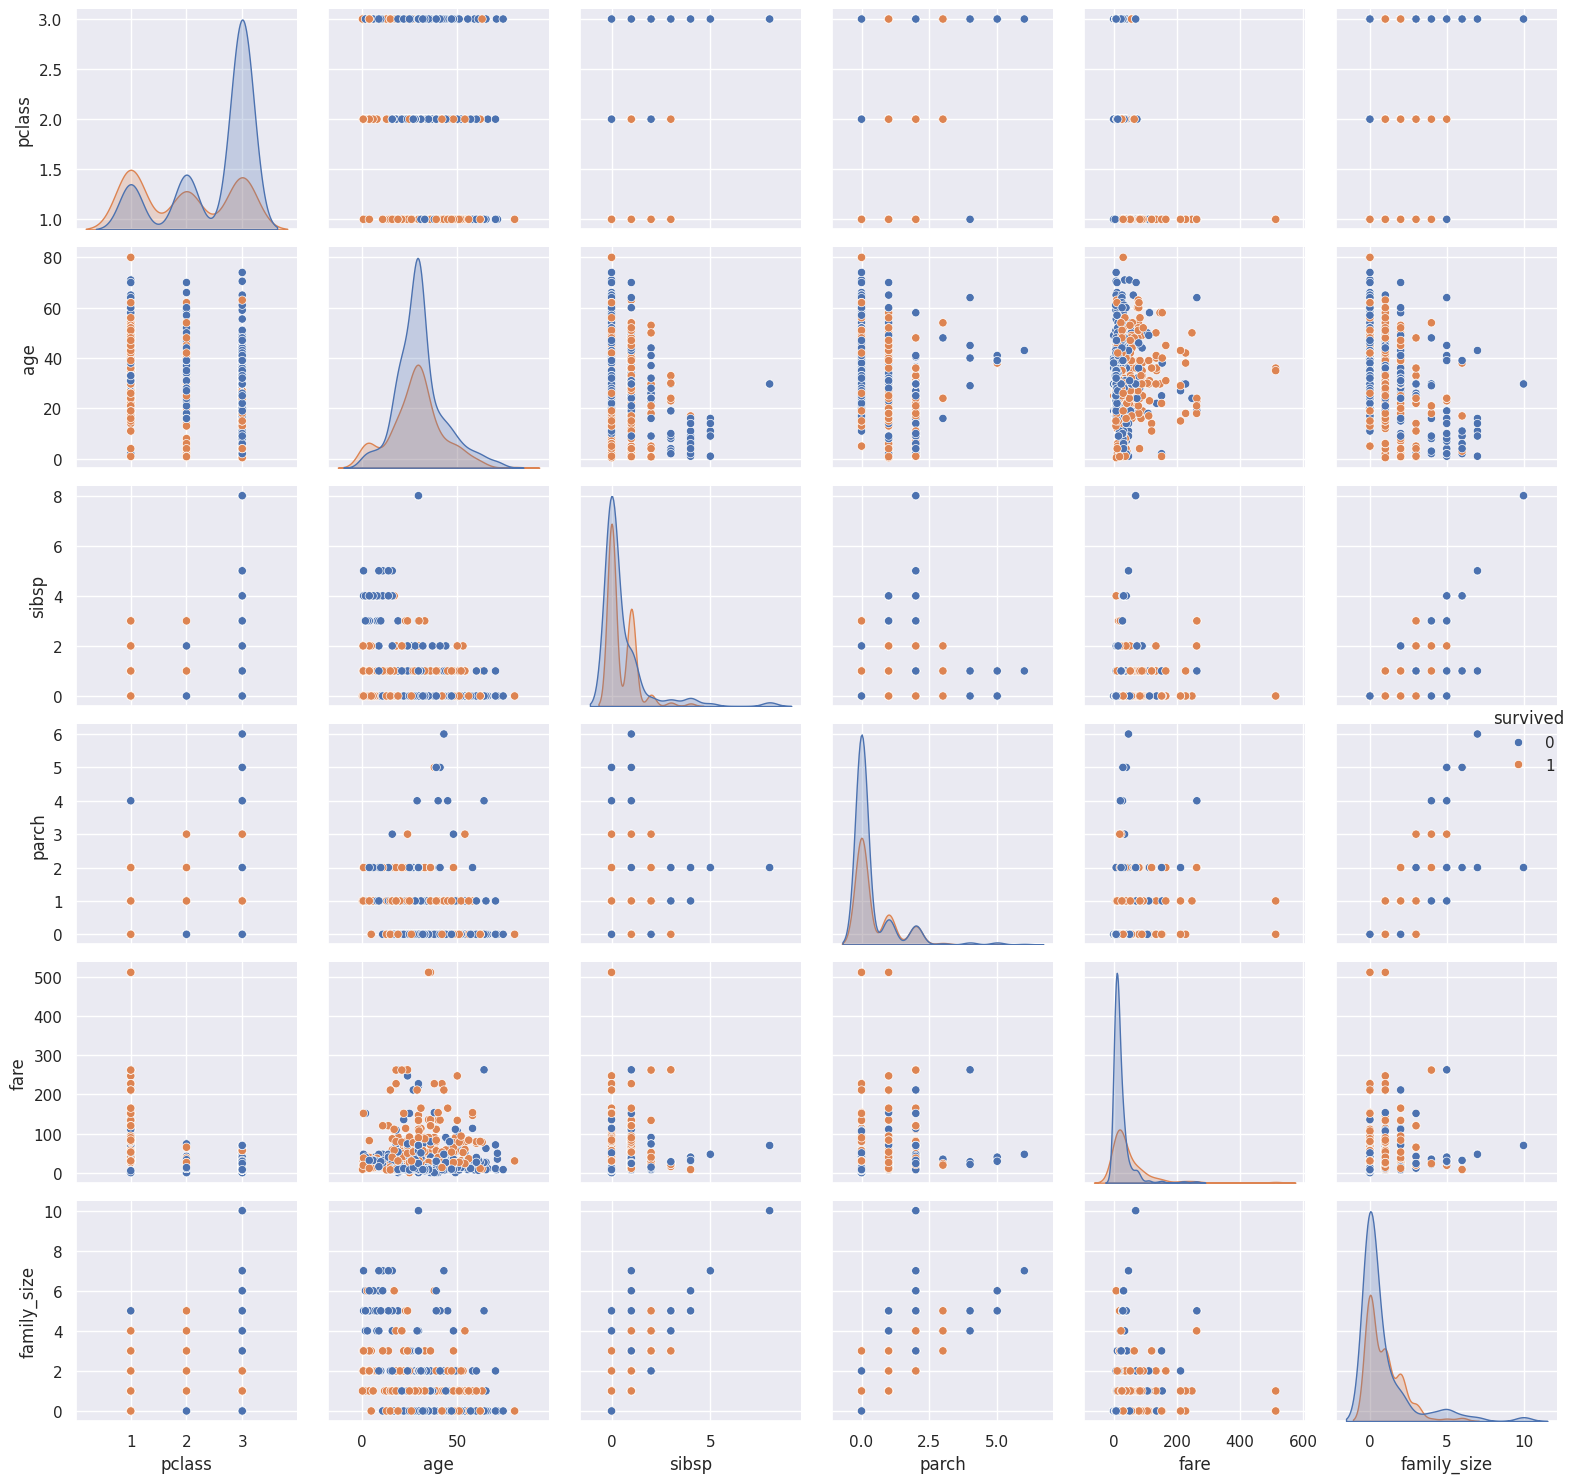

In [32]:
sns.pairplot(df, hue='survived')
plt.tight_layout()